<a href="https://colab.research.google.com/github/dim447/data_analyst/blob/main/Netologia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Цель задания: **
построить онлайн-дашборд с помощью Python.

Важно:
Данное задание с самопроверкой, оно не будет проверено экспертом, но после его выполнения вы получите вариант решения этой задачи от эксперта, и сможете сравнить ваш вариант с ним. Выполнение этого задания позволит вам отработать теорию, которую вы изучили, и с лёгкостью справляться с подобными задачами на практике.

Контекст
Вы — аналитик интернет-магазина. Перед вами стоит задача построить для своих коллег дашборд, по которому наглядно можно мониторить показатели интернет-магазина.

Описание задания
Задание 1.
Постройте столбчатую диаграмму распределения количества строк в файле sales.csv в каждом регионе. Подберите параметры визуализации так, чтобы график легко читался.

Задание 2.
Создайте дата фрейм sales_region, в котором для каждого региона и месяца посчитана сумма продаж. Постройте график динамики продаж по месяцам с возможностью выбора региона.

Формат выполнения
Выполнить задание можно в любой среде: в Google Collab или на своем компьютере в jupyter notebook.

Результат выполненного задания:
для корректной сдачи домашнего задания необходимо в личном кабинете прикрепить ссылку на ваше решение в Google Collab;
после того, как вы прикрепите ссылку на своё решение в личном кабинете, вам станет доступно эталонное решение, которое подготовил эксперт. Проверьте правильность выполнения этого задания самостоятельно, сравнив свой документ с эталоном.

In [3]:

### Загружаем библиотеку данных pandas и считываем данные из файла продаж
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_v2023-07-09.csv')
df.head()

,order_id,date,customer_id,category,region,sales,quantity,discount
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00
1,16578697,2017-07-18,512,Одежда и обувь,Ставропольский край,3530,4,0.05
2,46943601,2017-07-05,512,Бытовая техника,Ставропольский край,5773,1,0.10
3,42436035,2017-02-18,512,Спорт и отдых,Ставропольский край,4723,3,0.03
4,49798299,2017-09-08,512,Красота,Ставропольский край,1936,3,0.00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554192 entries, 0 to 1554191
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   order_id     1554192 non-null  int64  
 1   date         1554192 non-null  object 
 2   customer_id  1554192 non-null  int64  
 3   category     1554192 non-null  object 
 4   region       1554192 non-null  object 
 5   sales        1554192 non-null  int64  
 6   quantity     1554192 non-null  int64  
 7   discount     1554192 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 94.9+ MB


Задание 1. Постройте столбчатую диаграмму распределения количества строк в файле sales.csv в каждом регионе. Подберите параметры визуализации так, чтобы график легко читался.

In [14]:
sales_by_regions = df.groupby('region')['sales'].count().sort_values(ascending=False)
sales_by_regions

region
Амурская область         218842
Московская область       217496
Хабаровский край         174621
Ленинградская область    173933
Приморский край          132490
Краснодарский край       131607
Иркутская область        130660
Ставропольский край      109183
Владимирская область      89251
Красноярский край         88954
Смоленская область        87155
Name: sales, dtype: int64

Text(0, 0.5, '')

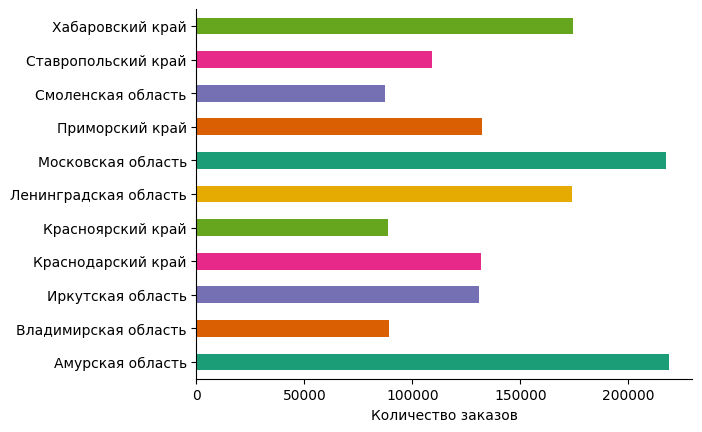

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Количество заказов')
plt.ylabel('')
# plt.legend()

In [42]:
df.groupby(['region', 'category']).size().unstack()

category,Аптека,Бытовая техника,Дача и сад,Красота,Мебель,Одежда и обувь,Продукты питания,Спорт и отдых
region,,,,,,,,
Амурская область,30616,17793,26484,8829,4138,41029,53952,36001
Владимирская область,12490,7428,10666,3643,1721,16800,21851,14652
Иркутская область,18264,10783,15701,5429,2481,24695,31969,21338
Краснодарский край,18277,10814,15957,5459,2523,24713,32346,21518
Красноярский край,12487,7290,10707,3623,1746,16665,21916,14520
Ленинградская область,24164,14162,21161,7283,3148,32440,42844,28731
Московская область,30549,17774,26363,9038,3975,40560,53573,35664
Приморский край,18719,10971,15969,5393,2462,24576,32507,21893
Смоленская область,12221,7085,10615,3640,1653,16322,21305,14314


<Axes: xlabel='region'>

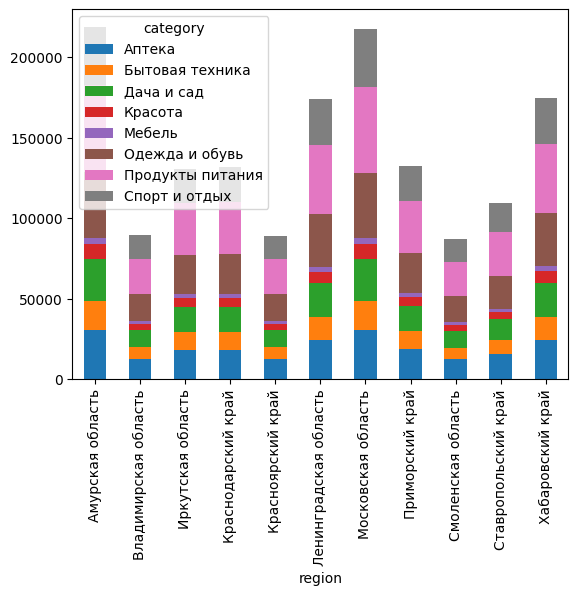

In [43]:
df.groupby(['region', 'category']).size().unstack().plot(kind='bar', stacked=True)

Задание 2. Создайте дата фрейм sales_region, в котором для каждого региона и месяца посчитана сумма продаж. Постройте график динамики продаж по месяцам с возможностью выбора региона.

In [17]:
df['Order_Date'] = df['date'].str[:7]
df.head()

,order_id,date,customer_id,category,region,sales,quantity,discount,Order_Date
0,59570135,2017-10-16,512,Одежда и обувь,Ставропольский край,1301,2,0.00,2017-10
1,16578697,2017-07-18,512,Одежда и обувь,Ставропольский край,3530,4,0.05,2017-07
2,46943601,2017-07-05,512,Бытовая техника,Ставропольский край,5773,1,0.10,2017-07
3,42436035,2017-02-18,512,Спорт и отдых,Ставропольский край,4723,3,0.03,2017-02
4,49798299,2017-09-08,512,Красота,Ставропольский край,1936,3,0.00,2017-09


In [54]:
sales_region = df.groupby(['Order_Date', 'category', 'region']).agg({'sales': 'sum'}).reset_index()
sales_region.head()

,Order_Date,category,region,sales
0,2017-01,Аптека,Амурская область,1255914
1,2017-01,Аптека,Владимирская область,483450
2,2017-01,Аптека,Иркутская область,754794
3,2017-01,Аптека,Краснодарский край,702687
4,2017-01,Аптека,Красноярский край,451583


In [64]:
sales_region_for_graph = sales_region.groupby(['Order_Date']).agg({'sales': 'sum'}).reset_index()
sales_region_for_graph.head()

,Order_Date,sales
0,2017-01,100584502
1,2017-02,127351202
2,2017-03,183609747
3,2017-04,218601894
4,2017-05,250450533


([<matplotlib.axis.XTick at 0x7f12601ea0e0>,
 [Text(1, 0, '2017-02'),
  Text(3, 0, '2017-04'),
  Text(5, 0, '2017-06'),
  Text(7, 0, '2017-08'),
  Text(9, 0, '2017-10'),
  Text(11, 0, '2017-12'),
  Text(13, 0, '2018-02'),
  Text(15, 0, '2018-04'),
  Text(17, 0, '2018-06'),
  Text(19, 0, '2018-08'),
  Text(21, 0, '2018-10'),
  Text(23, 0, '2018-12'),
  Text(25, 0, '2019-02'),
  Text(27, 0, '2019-04'),
  Text(29, 0, '2019-06'),
  Text(31, 0, '2019-08'),
  Text(33, 0, '2019-10')])

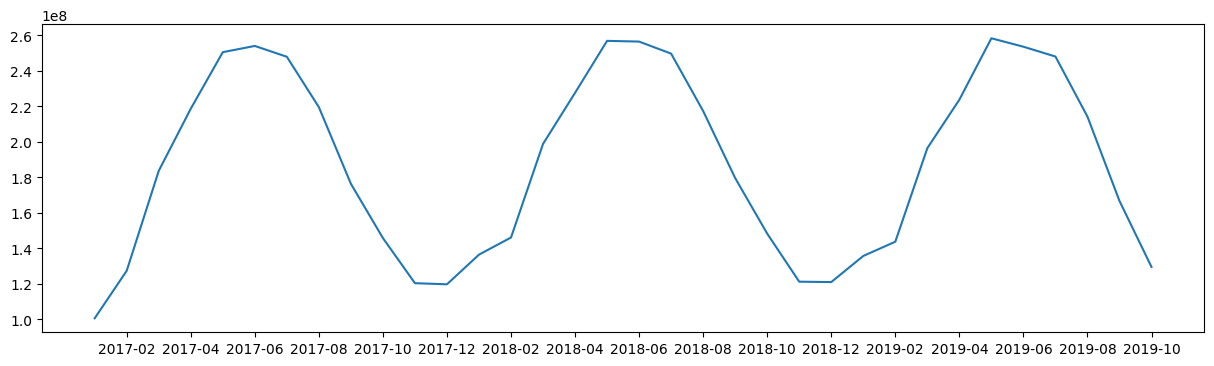

In [65]:
plt.figure(figsize=(15, 4))

plt.plot(sales_region_for_graph['Order_Date'], sales_region_for_graph['sales'])
plt.xticks(plt.xticks()[0][1::2])

In [66]:
import plotly.express as px
fig = px.line(sales_region_for_graph, x='Order_Date', y='sales', title='Продажи по месяцам')
fig.show()

In [67]:
fig = px.line(sales_region_for_graph, x='Order_Date', y='sales')
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))
fig.show()

In [69]:
sales_category = sales_region.groupby(['Order_Date', 'category'], as_index=False).sum()
sales_category.head()

<ipython-input-69-91a21dba1be3>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Order_Date,category,sales
0,2017-01,Аптека,8782967
1,2017-01,Бытовая техника,9694190
2,2017-01,Дача и сад,39043515
3,2017-01,Красота,672324
4,2017-01,Мебель,399374


In [70]:
fig = px.line(sales_category, x='Order_Date', y='sales', color='category')

fig.update_layout(
    updatemenus=[
        {
            "buttons": [{ "label": 'Все категории', "method": "restyle", "args": [{"visible": [True for _ in fig.data]}], }] +
            [
                {
                    "label": t.name,
                    "method": "restyle",
                    "args": [{"visible": [t2.name == t.name for t2 in fig.data]}],
                }
                for t in fig.data
            ]
        }
    ]
)

fig.show()